# State reconstruction

As we have seen in the last section, we can estimate the expectation values of $X$ and $Z$ by measuring identical preparation of a state.
We can therefore use that information to reconstruct a-posteriori what state we had prior the measurement

In [205]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
simulator = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator


import matplotlib.ticker as tck
import numpy as np


/var/folders/r8/01h7mk295_qg6429pfv0cscc0000gn/T/ipykernel_82647/2907826294.py:8: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


## After initializing the system in a random state, proceed to estimate its X component and Z component. 
- Proceed then to estimate your Bloch vector and check against the initial state


Real theta: 2.20, Estimated theta: 2.20
Real phi: 5.09, Estimated phi: 5.09


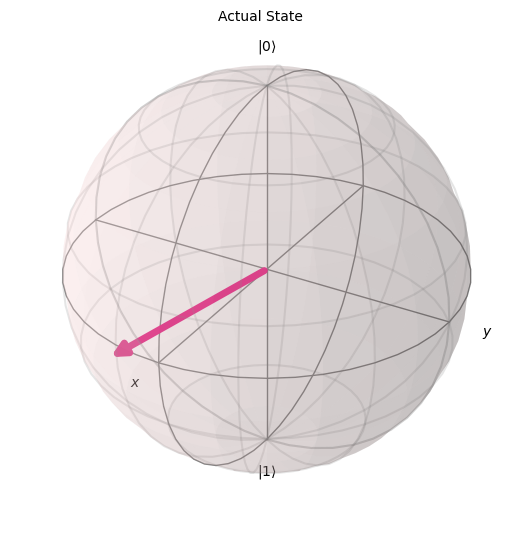

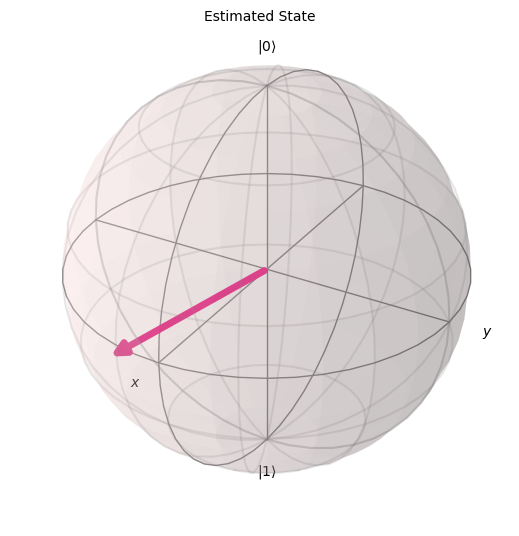

In [310]:
# Using AerSimulator to simulate the circuit
sim = AerSimulator()

def random_state():
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0,  np.pi)
    return theta, phi

theta_real, phi_real = random_state()

# Initialize a random state and measure <Z>
qc = QuantumCircuit(1,1)
qc.ry(theta_real, 0)
qc.rz(phi_real, 0)

qc.measure(0,0)
qc.draw('mpl')

job = sim.run(qc, shots=100000)
counts = job.result().get_counts()
pz = 2*counts['0'] / 100000 - 1


# Initialize a random state and measure <X>
qc = QuantumCircuit(1,1)
qc.ry(theta_real, 0)
qc.rz(phi_real, 0)

qc.barrier(0,0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

job = sim.run(qc, shots=100000)
counts = job.result().get_counts()
px = 2*counts['0'] / 100000 - 1


# From <X> and <Z> compute your estimates of theta and phi and check with the initial state
py = np.sqrt(1-px**2-pz**2)

# Compute estimated Bloch sphere angles
theta_est = np.arccos(pz)
if 
phi_est = 2*np.pi - np.arccos(px/(np.sqrt(px**2+py**2)))
#np.arctan2(py,px)

# Print results
print(f"Real theta: {theta_real:.2f}, Estimated theta: {theta_est:.2f}")
print(f"Real phi: {phi_real:.2f}, Estimated phi: {phi_est:.2f}")

# Plot Bloch vectors
display(plot_bloch_vector([1, theta_real, phi_real], title="Actual State", coord_type='spherical'))
display(plot_bloch_vector([1, theta_est, phi_est], title="Estimated State", coord_type='spherical'))




In [255]:
# Try now to run the circuit with a real quantum computer and compare the results


In [ ]:
# transpiling the circuits
from qiskit_ibm_runtime import QiskitRuntimeService
# Let s find the least busy backend
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy()
print(backend.name)
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend) 
pm.run(qc)